# Animal Shelter EDA

## Import Relevant Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
import cufflinks # !pip install ipywidgets
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from plotly.offline import iplot

## Data Importation and Cleaning

In [47]:
df = pd.read_excel('data/EDA Instructions and Data.xlsx', sheet_name = 'Data')
df.shape

(22557, 34)

In [48]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,6301,4,OWNER SURRENDER,GENERAL,1,PERSNLISSU,CDM,2019-11-08,15:48:00,2019-11-14,APP SICK,NaN,RETURNED TO OWNER,WALK IN,2019-11-09,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,7102,2,OWNER SURRENDER,DEAD ON ARRIVAL,1,OTHRINTAKS,CDM,2019-11-10,14:18:00,2019-11-10,DEAD,NaN,DEAD ON ARRIVAL,DISPOSAL,2019-11-10,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,4600,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,16605,8,OWNER SURRENDER,GENERAL,1,OTHER,RA 1549,2019-10-11,09:55:00,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,EMERGENCY RESCUE,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,6900,1,STRAY,AT LARGE,1,OTHRINTAKS,JR,2019-11-08,11:55:00,2019-11-14,APP WNL,RESCU ONLY,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 34 columns):
Animal Id                 22557 non-null object
Animal Type               22557 non-null object
Animal Breed              22557 non-null object
Kennel Number             22557 non-null object
Kennel Status             22557 non-null object
Tag Type                  0 non-null float64
Activity Number           11974 non-null object
Activity Sequence         22557 non-null int64
Source Id                 22557 non-null object
Census Tract              19799 non-null object
Council District          19799 non-null object
Intake Type               22557 non-null object
Intake Subtype            22557 non-null object
Intake Total              22557 non-null int64
Reason                    21229 non-null object
Staff Id                  22557 non-null object
Intake Date               22557 non-null datetime64[ns]
Intake Time               22557 non-null object
Due Out                 

In [50]:
# Specify columns to drop
dropped_cols = ['Tag Type','Activity Number','Activity Sequence','Source Id','Intake Total',
                'Reason','Staff Id','Hold Request','Receipt Number','Impound Number',
                'Service Request Number','Chip Status','Animal Origin','Additional Information']

df = df.drop(dropped_cols, axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 20 columns):
Animal Id            22557 non-null object
Animal Type          22557 non-null object
Animal Breed         22557 non-null object
Kennel Number        22557 non-null object
Kennel Status        22557 non-null object
Census Tract         19799 non-null object
Council District     19799 non-null object
Intake Type          22557 non-null object
Intake Subtype       22557 non-null object
Intake Date          22557 non-null datetime64[ns]
Intake Time          22557 non-null object
Due Out              22557 non-null datetime64[ns]
Intake Condition     22557 non-null object
Outcome Type         22557 non-null object
Outcome Subtype      22557 non-null object
Outcome Date         22190 non-null datetime64[ns]
Outcome Time         22557 non-null object
Outcome Condition    21019 non-null object
Month                22557 non-null object
Year                 22557 non-null object
dtypes:

In [52]:
# Check null values
df.isnull().sum()

Animal Id               0
Animal Type             0
Animal Breed            0
Kennel Number           0
Kennel Status           0
Census Tract         2758
Council District     2758
Intake Type             0
Intake Subtype          0
Intake Date             0
Intake Time             0
Due Out                 0
Intake Condition        0
Outcome Type            0
Outcome Subtype         0
Outcome Date          367
Outcome Time            0
Outcome Condition    1538
Month                   0
Year                    0
dtype: int64

In [53]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,6301,4,OWNER SURRENDER,GENERAL,2019-11-08,15:48:00,2019-11-14,APP SICK,RETURNED TO OWNER,WALK IN,2019-11-09,11:31:00,APP SICK,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,7102,2,OWNER SURRENDER,DEAD ON ARRIVAL,2019-11-10,14:18:00,2019-11-10,DEAD,DEAD ON ARRIVAL,DISPOSAL,2019-11-10,00:00:00,DEAD,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,4600,1,STRAY,AT LARGE,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,16605,8,OWNER SURRENDER,GENERAL,2019-10-11,09:55:00,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,17:35:00,TREATABLE REHABILITABLE NON-CONTAGIOUS,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,6900,1,STRAY,AT LARGE,2019-11-08,11:55:00,2019-11-14,APP WNL,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,APP WNL,NOV.2019,FY2020


## Some Data Exploration

It's good to explore entries that have missing values to determine why they might be missing.

In [71]:
# Let's explore what these null entries look like

# Identify columns with nulls
cols = df.columns[df.isnull().any()]
print(cols)

# Look at the table
df.loc[df['Outcome Condition'].isnull()].sample(5)
# many of these animals have been sheltered > 7 days w/ outcome type = ['LOST EXP', 'FOUND EXP', 'OTHER']

Index(['Census Tract', 'Council District', 'Outcome Date',
       'Outcome Condition'],
      dtype='object')


,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
21513,A1099111,DOG,POODLE TOY,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-03-24,16:25:00,2020-03-24,NORMAL,LOST EXP,OTHER,2020-04-24,00:00:00,NaN,MAR.2020,FY2020
13788,A1092146,DOG,JAPANESE CHIN,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-12-29,02:25:00,2019-12-31,NORMAL,LOST EXP,OTHER,2020-01-31,00:00:00,NaN,DEC.2019,FY2020
20129,A1096038,DOG,ALASKAN HUSKY,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-02-12,19:25:00,2020-02-14,NORMAL,LOST EXP,OTHER,2020-03-16,00:00:00,NaN,FEB.2020,FY2020
22460,A1100892,DOG,PIT BULL,LFD 090,IMPOUNDED,11300,3,STRAY,AT LARGE,2020-05-07,17:48:00,2020-05-11,APP WNL,OTHER,OTHER,NaT,00:00:00,NaN,MAY.2020,FY2020
16528,A1092932,CAT,RUSSIAN BLUE,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-01-07,11:25:00,2020-01-09,NORMAL,LOST EXP,OTHER,2020-02-09,00:00:00,NaN,JAN.2020,FY2020


In [77]:
df.loc[df['Outcome Date'].isnull()].sample(5)
# These animals most likely still at shelter

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
21590,A1100362,DOG,DOBERMAN PINSCH,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-22,16:25:00,2020-04-25,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020
21721,A1100455,CAT,DOMESTIC SH,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-25,02:25:00,2020-04-28,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020
22503,A1092903,DOG,PIT BULL,LFD 102,IMPOUNDED,16701,8,STRAY,AT LARGE,2020-05-07,18:37:00,2020-05-13,APP WNL,OTHER,OTHER,NaT,00:00:00,NaN,MAY.2020,FY2020
22472,A1100915,CAT,DOMESTIC SH,N01,UNAVAILABLE,20400,2,STRAY,CONFINED,2020-05-08,09:30:00,2020-05-08,APP SICK,FOSTER,UNDERAGE,NaT,00:00:00,UNDERAGE,MAY.2020,FY2020
22037,A1100688,CAT,DOMESTIC SH,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-04-28,16:25:00,2020-05-03,NORMAL,OTHER,OTHER,NaT,00:00:00,NaN,APR.2020,FY2020


In [78]:
# Sanity check
print(df['Outcome Date'].sort_values(ascending=False).head())
# latest date is 5/8/20

22424   2020-05-08
22434   2020-05-08
22475   2020-05-08
22467   2020-05-08
22466   2020-05-08
Name: Outcome Date, dtype: datetime64[ns]


In [72]:
df.loc[df['Census Tract'].isnull()].sample(5)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
17772,A1087160,DOG,GREYHOUND,AD 067,UNAVAILABLE,NaN,NaN,TRANSFER,OTHER,2020-02-15,13:38:00,2020-02-15,APP WNL,ADOPTION,WALK IN,2020-02-28,12:47:00,APP WNL,FEB.2020,FY2020
19797,A1098385,DOG,CATAHOULA,LFSD 04,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-03-12,17:15:00,2020-03-13,APP WNL,ADOPTION,WESTMORELD,2020-03-14,13:59:00,APP WNL,MAR.2020,FY2020
17426,A1095990,DOG,GERM SHEPHERD,CC 17,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-02-14,11:47:00,2020-02-14,APP WNL,TRANSFER,TRANSPORT,2020-02-18,16:38:00,APP WNL,FEB.2020,FY2020
16460,A1092913,DOG,AUST CATTLE DOG,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2020-01-06,00:25:00,2020-01-09,NORMAL,LOST EXP,OTHER,2020-02-09,00:00:00,NaN,JAN.2020,FY2020
15740,A1092301,DOG,SIBERIAN HUSKY,LOST,IMPOUNDED,NaN,NaN,STRAY,WEB,2019-12-28,00:25:00,2020-01-02,NORMAL,LOST EXP,OTHER,2020-02-02,00:00:00,NaN,DEC.2019,FY2020


In [73]:
df.loc[df['Council District'].isnull()].sample(5)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Census Tract,Council District,Intake Type,Intake Subtype,Intake Date,Intake Time,Due Out,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Outcome Condition,Month,Year
20477,A1095902,CAT,DOMESTIC SH,F1,UNAVAILABLE,NaN,NaN,TREATMENT,ILLNESS,2020-04-10,09:42:00,2020-04-10,APP WNL,TREATMENT,COMPLETED,2020-04-10,12:46:00,APP WNL,APR.2020,FY2020
1445,A1096231,DOG,CHIHUAHUA SH,INJD 015,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-02-17,14:52:00,2020-02-17,APP WNL,TRANSFER,MEDICAL-CONTAGIOUS,2020-02-19,11:14:00,APP WNL,FEB.2020,FY2020
19151,A1091964,DOG,GERM SHEPHERD,LFD 080,UNAVAILABLE,NaN,NaN,OWNER SURRENDER,GENERAL,2020-03-05,17:45:00,2020-03-05,APP WNL,ADOPTION,WALK IN,2020-03-06,14:12:00,APP WNL,MAR.2020,FY2020
20060,A1097212,DOG,PIT BULL,F1,AVAILABLE,NaN,NaN,FOSTER,TREATMENT,2020-03-27,11:46:00,2020-03-27,APP WNL,FOSTER,TREATMENT,2020-03-27,15:26:00,APP WNL,MAR.2020,FY2020
22081,A1094690,DOG,GERM SHEPHERD,AD 001,UNAVAILABLE,NaN,NaN,FOSTER,RETURN,2020-05-04,12:34:00,2020-05-04,APP WNL,ADOPTION,IN FOSTER,2020-05-04,12:40:00,APP WNL,MAY.2020,FY2020


In [82]:
# Check if the missing values for 'Council District' and 'Census Tract' occur within the same records
temp_df1 = df.loc[df['Council District'].isnull()]
temp_df2 = df.loc[df['Census Tract'].isnull()]

temp_df1.equals(temp_df2) # yes

True

## Univariate Analysis

### Types of Animals

Types of Animals:  ['DOG', 'CAT', 'BIRD', 'WILDLIFE', 'LIVESTOCK'] 

DOG          16617
CAT           5143
WILDLIFE       671
BIRD           111
LIVESTOCK       15
Name: Animal Type, dtype: int64


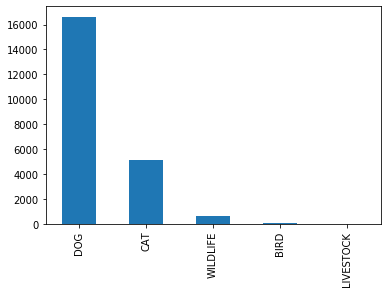

In [105]:
# Explore the Animal Type field

# List unique categories
print('Types of Animals: ', list(df['Animal Type'].unique()), '\n')

# Frequency counts
print(df['Animal Type'].value_counts())

# simple bar chart
df['Animal Type'].value_counts().plot.bar()

# df['Animal Type'].value_counts().iplot(
#     kind='bar', xTitle='Count', linecolor='black', orientation='v', color='blue', title='Distribution of Animal Types')

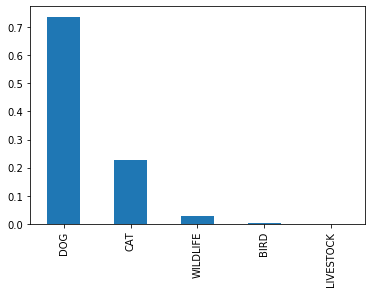

In [95]:
df['Animal Type'].value_counts(normalize=True).plot.bar()

### Location of Events

In [108]:
print('Total Census Tracts: ',len(df['Census Tract'].unique()))
print('Total Council Districts: ',len(df['Council District'].unique()))

Total Census Tracts:  312
Total Council Districts:  17


#### Census Tracts

Top Census Tracts with Events Occuring: 

20500    3684
11900     241
11602     237
17102     236
8802      220
11800     218
11701     218
10601     215
9201      208
17004     203
Name: Census Tract, dtype: int64


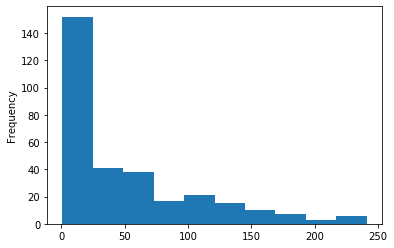

In [170]:
# Explore frequency of animal rescues by census tracts
print('Top Census Tracts with Events Occuring:', '\n')
print(df['Census Tract'].value_counts().sort_values(ascending=False).head(10))

tract_freq = df['Census Tract'].value_counts()
tract_freq.loc[tract_freq<250].plot(kind='hist')
# df['Animal Type'].value_counts().plot.bar()

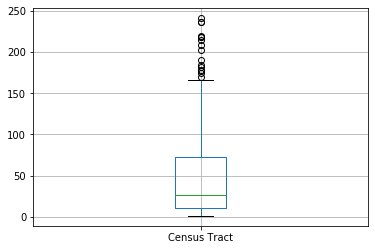

In [119]:
# Alternatively
tract_freq.loc[tract_freq<250].to_frame().boxplot()

#### Council Districts

In [158]:
district_freq = df['Council District'].value_counts().drop(labels=['AS',0])
district_freq

6     5158
4     2404
8     2238
5     2069
7     1609
1     1436
3     1413
2      869
9      751
10     456
14     392
13     392
11     347
12     250
Name: Council District, dtype: int64

#### Frequency of Events by Council District

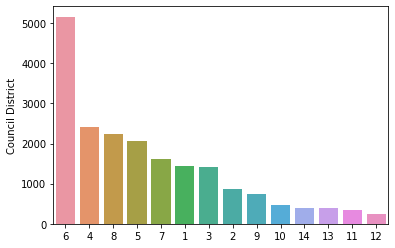

In [159]:
sns.barplot(x=district_freq.index, y = district_freq, order=district_freq.index)

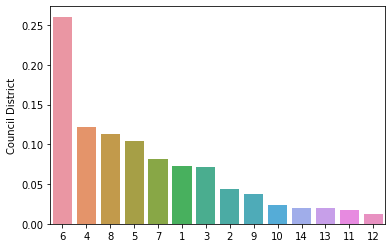

In [161]:
trace = df['Council District'].value_counts(normalize=True).drop(labels=['AS',0])

sns.barplot(x=district_freq.index, y = trace, order=district_freq.index)

### Intake Type

In [165]:
print('Total Intake Types: ', len(df['Intake Type'].unique()))
intake_freq = df['Intake Type'].value_counts()
intake_freq

Total Intake Types:  9


STRAY              13010
OWNER SURRENDER     4500
FOSTER              2414
CONFISCATED          865
TREATMENT            843
WILDLIFE             532
TRANSFER             350
KEEPSAFE              33
DISPOS REQ            10
Name: Intake Type, dtype: int64

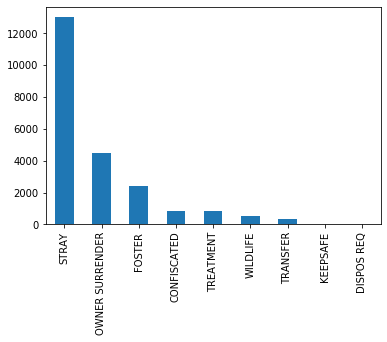

In [171]:
df['Intake Type'].value_counts().plot.bar()

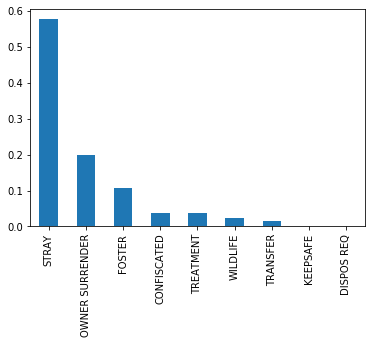

In [172]:
df['Intake Type'].value_counts(normalize=True).plot.bar()

We can see that the majority of shelter animals are strays. With ~80% being strays or surrendered animals.

### Intake Date

When are these events occurring during the year?